In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv("ml_project1_data.csv")

# 1.0 Análise Exploratória de Dados

Plotagem de dados nulos

<AxesSubplot:>

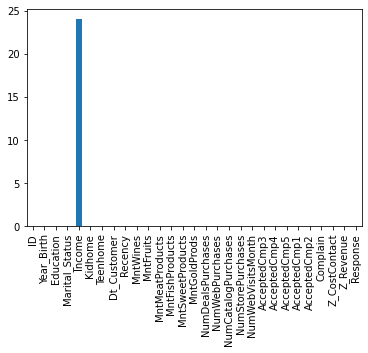

In [3]:
df.isna().sum().plot(kind='bar')

Verificação de tipos

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Separação de colunas de MNT (Amout) e de outras colunas numéricas para ajudar no slicing do dataset futuramente, assim como as plotagens.

In [5]:
MNT_COLUMNS = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts']
NUM_COLUMNS = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

### 1.1 - Detecção da presença outliers

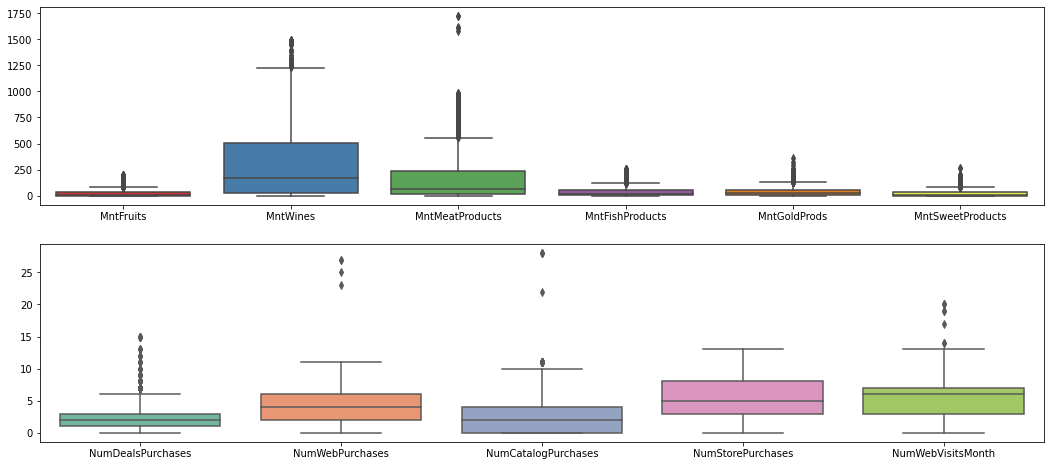

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
ax1 = sns.boxplot(data=df[MNT_COLUMNS], palette="Set1", ax=axes[0])
ax2 = sns.boxplot(data=df[NUM_COLUMNS], palette="Set2",ax=axes[1])

Aqui podemos observar a presença de valores outliers em algumas das colunas que terão de ser tratadas futuramente.

In [7]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

A coluna Incone ficou fora do boxplot por conta da sua diferença de escala de valores, iria prejudicar a visualização, entao podemos observar suas informaçoes via describe.
Conseguimos observar um alto valor no seu MAX, criando uma forte amplitude em relação ao valor MIN, assim como a distribuição dos quartis, ou seja, valores outliers e sem distribuição normal.

### 1.2 - Matriz de correlação do dataset completo

A matriz de correlação é referente aos dados "Cru" recem lidos e sem alterações, conseguimos observar os melhores e os piores que influenciam na correlação positiva do Target (Response)

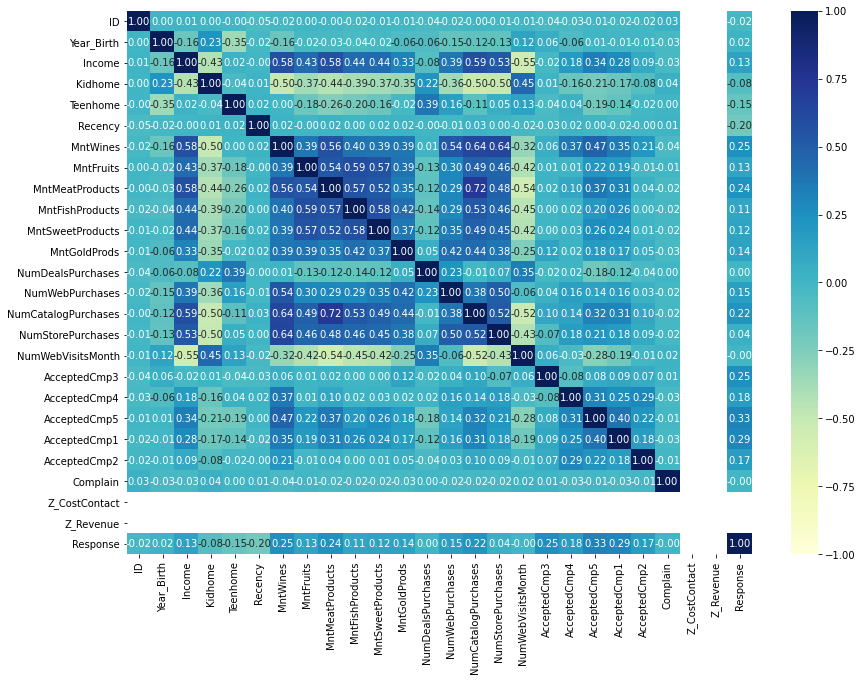

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

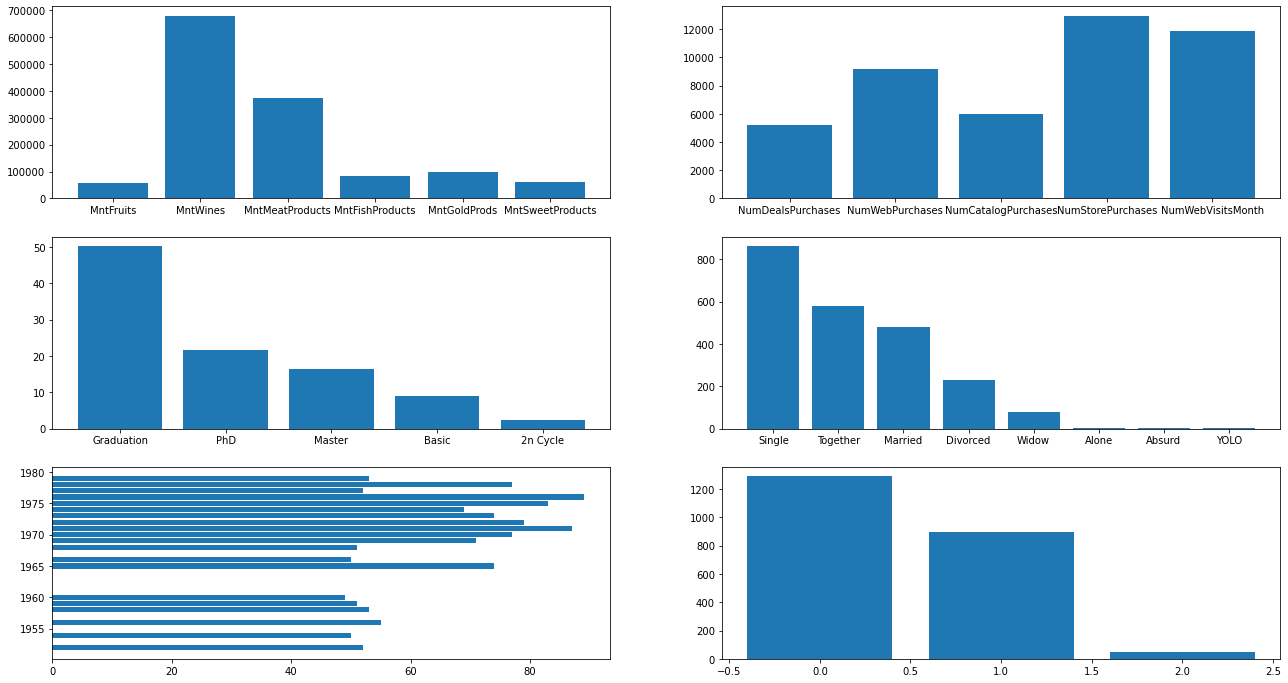

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(22, 12))
ax1 = axes[0, 0].bar(df[MNT_COLUMNS].columns, df[MNT_COLUMNS].sum())
ax2 = axes[0, 1].bar(df[NUM_COLUMNS].columns, df[NUM_COLUMNS].sum())
ax3 = axes[1, 0].bar(df['Education'].unique(), df['Education'].value_counts(normalize=True)*100)
ax4 = axes[1, 1].bar(df['Marital_Status'].unique(), df['Marital_Status'].value_counts())
ax5 = axes[2, 0].barh(df['Year_Birth'].value_counts().sort_values(ascending = False).head(20).index, df['Year_Birth'].value_counts().sort_values(ascending = False).head(20))
ax4 = axes[2, 1].bar(df['Kidhome'].value_counts().index, df['Kidhome'].value_counts())

1. Valores acumulados para cada variável de MNT, o maior valor acumulado de compras é <b>MntWines</b>, seguido de <b>MntMeatProducts</b>.
2. Valores acumulados para cada variável numerica, o maior valor acu
3. Contagem e agrupamento por nível de educação, podemos observar uma maior presença de pessoas que possuem nivel de "Graduação" e que aderiram a campanha
4. Contagem de Marital_Status, os valores predominantes são para pessoas "Solteiras"
5. Contagem de pessoas pelo ano de nascimento, sendo eles mais relevantes nascidos na decada de 70, com o maior valor para nascidos em 1976.
6. Contagem pela quantidade de filhos em casa, isso podemos observar que a maioria das pessoas que aderiram a campanha não tem filhos, e uma boa parcela tem apenas 1 filho.

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
 

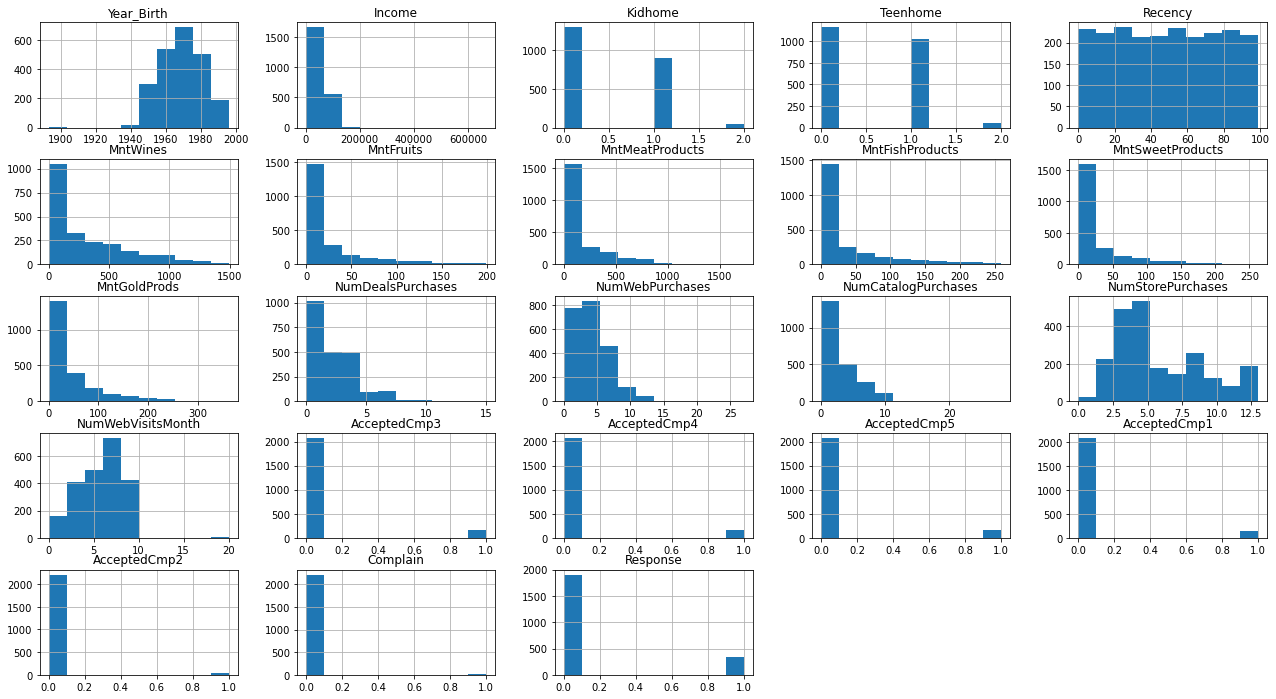

In [10]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1).hist(figsize=(22,12))

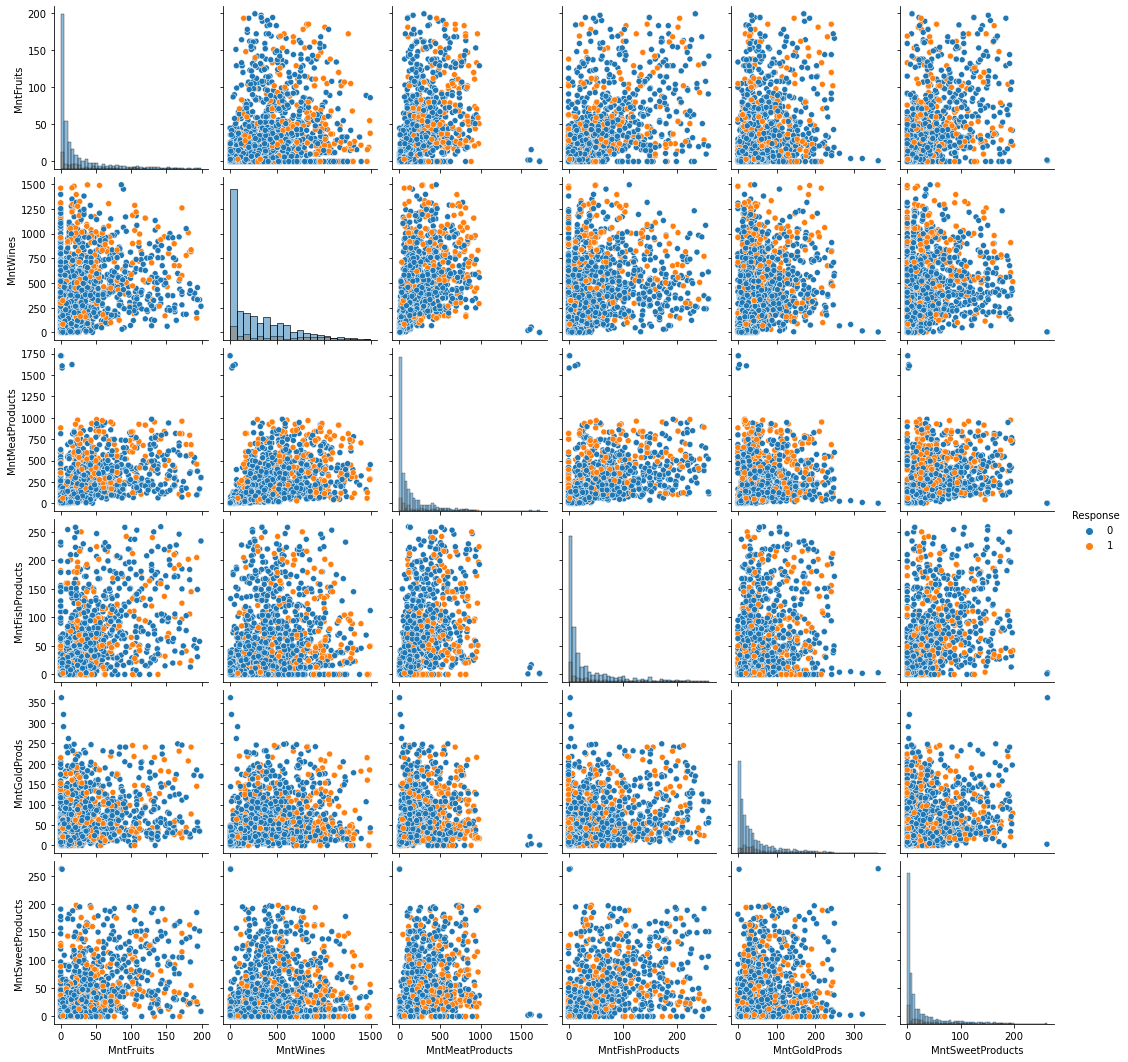

In [11]:
sns.pairplot(df, vars = MNT_COLUMNS, hue='Response', diag_kind = 'hist')
plt.show()

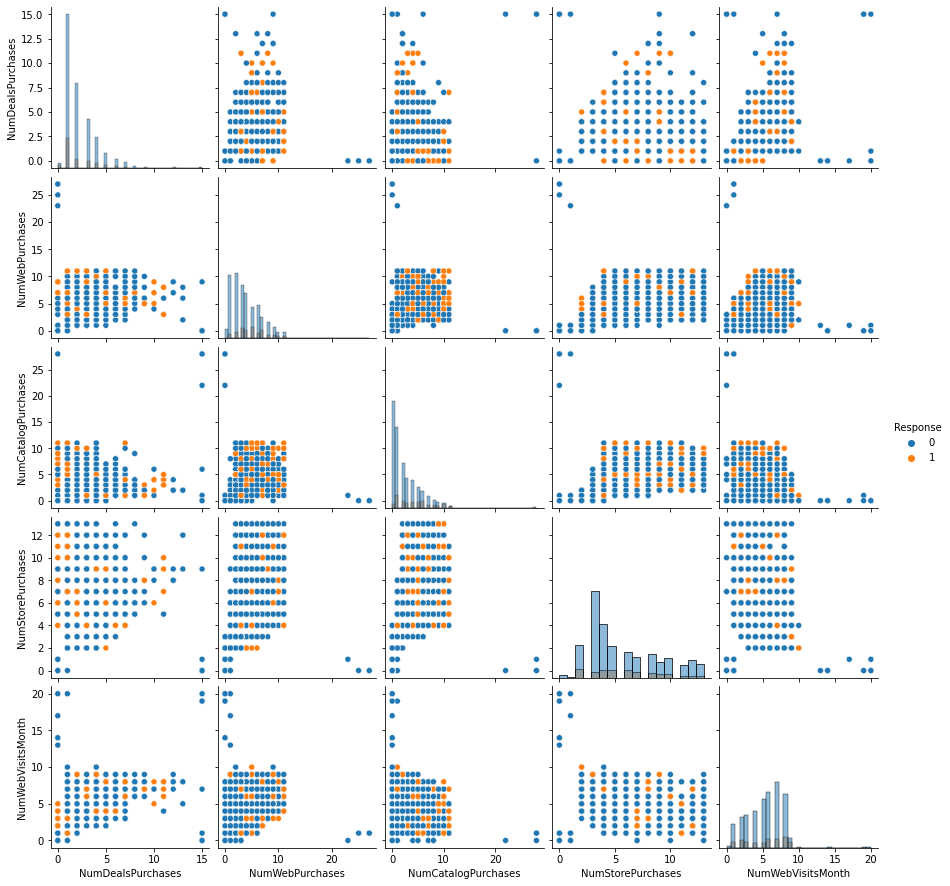

In [12]:
sns.pairplot(df, vars = NUM_COLUMNS, hue='Response', diag_kind = 'hist')
plt.show()

<AxesSubplot:>

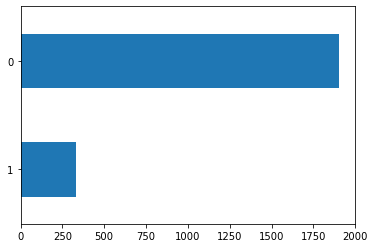

In [13]:
df.Response.value_counts().sort_values().plot(kind = 'barh')

# 2.0 - Pré Processamento

In [14]:
df = df.copy().dropna()

Existem 24 valores nulos na coluna Income, podemos excluir as linhas correspondentes, pois não afetara tanto na quantidade de dados do dataframe.

In [15]:
df = df.loc[df['Year_Birth'] > 1900]

Existem anos discrepantes da realidade, como anos abaixo de 1900, podemos desconsidera-los, por serem, digamos que, outliers.

In [16]:
df = df.loc[df['MntMeatProducts'] < 1000]

Nessa coluna ocorre uma discrepancia em valores, outliers, podemos considerar a faixa onde estão concentradas a maior parte dos dados.

In [17]:
df = df.loc[df['Income'] < 150000]

Mesma coisa ocorre na coluna Income, valores discrepantes e distantes da media e dos quartis, podemos considerar a area de maior concentração, filtrando pelos valores desejados.

Podemos observar que existem varios tipos de status conjugais, vamos classificar da seguinte forma para simplificar na modelagem: 
- Divorced = Single
- Widow = Single
- Alone = Single
- Absurd = Single
- YOLO = Single

ou seja, todos eles tem descrição diferentes mas afinal de contas são solteiros.

In [18]:
df['Marital_Status'].value_counts()

Married     853
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [19]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Single' , 'Widow' , 'Alone' , 'Absurd' , 'YOLO'] else x)

In [20]:
df['Marital_Status'].value_counts()

Married     853
Together    568
Single      553
Divorced    230
Name: Marital_Status, dtype: int64

Aqui podemos ver a mudança após o tratamento feito, o valor Single teve algumas novas classificaçoes

In [21]:
df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis = 1)

Desconsideradas as colunas que não fazem sentido na modelagem preditiva, identificadores unicos, nulos, e a data

<AxesSubplot:>

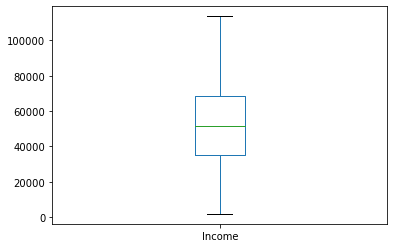

In [22]:
df.Income.plot(kind = 'box')

Como os dados precisam seguir uma mesma faixa de escala, vamos normalizar todas as colunas numericas do dataset.

In [23]:
df[NUM_COLUMNS] = StandardScaler().fit_transform(df[NUM_COLUMNS])
df[MNT_COLUMNS] = StandardScaler().fit_transform(df[MNT_COLUMNS])
df[['Income', 'Recency']] = StandardScaler().fit_transform(df[['Income', 'Recency']])

# 3.0 - Feature Engineering

In [25]:
#Correlation with output variable
cor_target = abs(cor["Response"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]

Selecionadas as features de maiores correlação com a variavel Target, entretanto adicionaremos as variaveis categoricas Education e Marital_Status no nosso conjunto de features
que usaremos para treinar o modelo preditivo.

In [26]:
relevant_features = list(relevant_features.index)

In [27]:
relevant_features.append('Education')
relevant_features.append('Marital_Status')

In [28]:
df = df[relevant_features].copy()


In [29]:
df

Income  Teenhome   Recency  MntWines  MntFruits  MntMeatProducts  \
0     0.313904         0  0.310654  0.974115   1.548116         1.772001   
1    -0.256225         1 -0.380629 -0.875150  -0.638868        -0.736891   
2     0.965294         0 -0.795398  0.354730   0.567744        -0.174713   
3    -1.208438         0 -0.795398 -0.875150  -0.563455        -0.671846   
4     0.321397         0  1.554963 -0.395053   0.416917        -0.216528   
...        ...       ...       ...       ...        ...              ...   
2235  0.463035         1 -0.104116  1.193419   0.416917         0.080822   
2236  0.597953         1  0.241525  0.295458  -0.664006        -0.625385   
2237  0.257974         0  1.451270  1.783169   0.542606         0.243435   
2238  0.850823         1 -1.417553  0.360657   0.090126         0.229497   
2239  0.059198         1 -0.311501 -0.658810  -0.588593        -0.481356   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
0            2.448544          1.479812      0.849120         1.424495   
1           -0.652568         -0.635602     -0.736093        -1.133958   
2            1.335792         -0.149300     -0.040146         1.424495   
3           -0.506633         -0.586971     -0.755425        -0.768464   
4            0.150073         -0.003409     -0.562106         0.328015   
...               ...               ...           ...              ...   
2235         0.077106          2.209266      3.922885         1.789988   
2236        -0.689051         -0.659917     -0.697429         1.424495   
2237        -0.105313         -0.368136     -0.388120        -0.768464   
2238         0.770295          0.069536      0.327159         0.693508   
2239        -0.652568         -0.635602     -0.446115        -0.402971   

      NumCatalogPurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                2.682485             0             0             0   
1               -0.594988             0             0             0   
2               -0.230824             0             0             0   
3               -0.959152             0             0             0   
4                0.133339             0             0             0   
...                   ...           ...           ...           ...   
2235             0.133339             0             0             0   
2236            -0.230824             0             0             0   
2237             0.133339             0             1             0   
2238             0.861667             0             0             0   
2239            -0.594988             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response   Education Marital_Status  
0                0             0         1  Graduation         Single  
1                0             0         0  Graduation         Single  
2                0             0         0  Graduation       Together  
3                0             0         0  Graduation       Together  
4                0             0         0         PhD        Married  
...            ...           ...       ...         ...            ...  
2235             0             0         0  Graduation        Married  
2236             1             0         0         PhD       Together  
2237             0             0         0  Graduation       Divorced  
2238             0             0         0      Master       Together  
2239             0             0         1         PhD        Married  

[2204 rows x 19 columns]

In [30]:
# df['Year_Birth'].sub(2022, axis = 0).abs()
df = pd.get_dummies(df)

Transformaremos as variaveis categorias em um conjunto de matriz, a partir do comando get dummies do pandas, cada categoria sera transformada em uma coluna binária
pro algoritmo melhor entender a tratativa classificatoria e por se tratar de variaveis qualitativas nao ordinais

# 4.0 - Modelagem

Nessa seção foi feito:

    -> A separação do dataset em X (todas as features) e y (target/Response)
    
    -> OVERSAMPLE do conjunto de dados, expandiremos as minorias para um aprendizado alinhado.
    
    -> Split do conjunto de treino e teste.

In [48]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [32]:
y.value_counts()

0    1871
1     333
Name: Response, dtype: int64

In [49]:
oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4.1 - Random Forest

Para cada modelo, faremos:

    -> Escolheremos os melhores atributos para o treinamento do modelo (Calibragem) com GridSearchCV.
    -> Treinaremos o modelo
    -> Faremos as avaliaçoes em metricas da modelagem (Matriz de correlação, ROC, Acurracy, Precision, Recall, etc.)

In [50]:
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [51]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 300}

In [52]:
clf = RandomForestClassifier(random_state = 42, criterion= 'gini',max_depth= 8,max_features= 'log2',n_estimators= 200)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200,
                       random_state=42)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       621
           1       0.81      0.27      0.41       107

    accuracy                           0.88       728
   macro avg       0.85      0.63      0.67       728
weighted avg       0.88      0.88      0.86       728



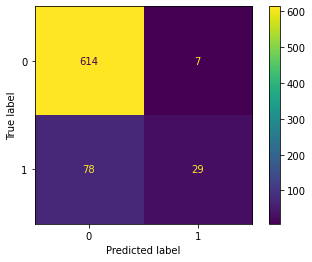

In [55]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

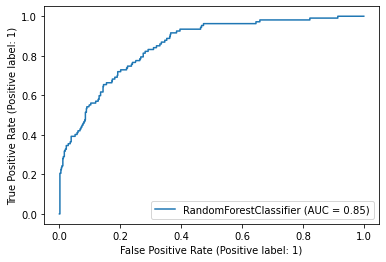

In [56]:
metrics.plot_roc_curve(clf, X_test, y_test)

## 4.2 - Support Vector Machine

In [41]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
grid_SVM = GridSearchCV(SVC(), param_grid, cv = 5)
grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']})

In [42]:
grid_SVM.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [43]:
svm = SVC(C=1000, gamma = 1, kernel = 'rbf')

In [44]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       638
           1       0.94      0.91      0.93       597

    accuracy                           0.93      1235
   macro avg       0.93      0.93      0.93      1235
weighted avg       0.93      0.93      0.93      1235



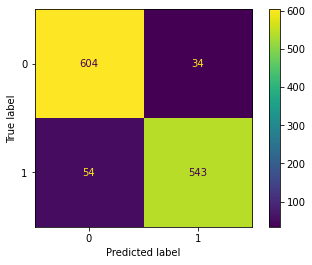

In [46]:
metrics.plot_confusion_matrix(svm, X_test, y_test)

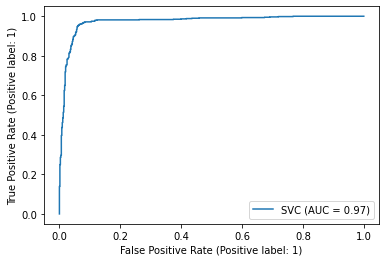

In [47]:
metrics.plot_roc_curve(svm, X_test, y_test)